# Electrical Fault Dataset Analysis Techniques

1. Distribution of Input Features

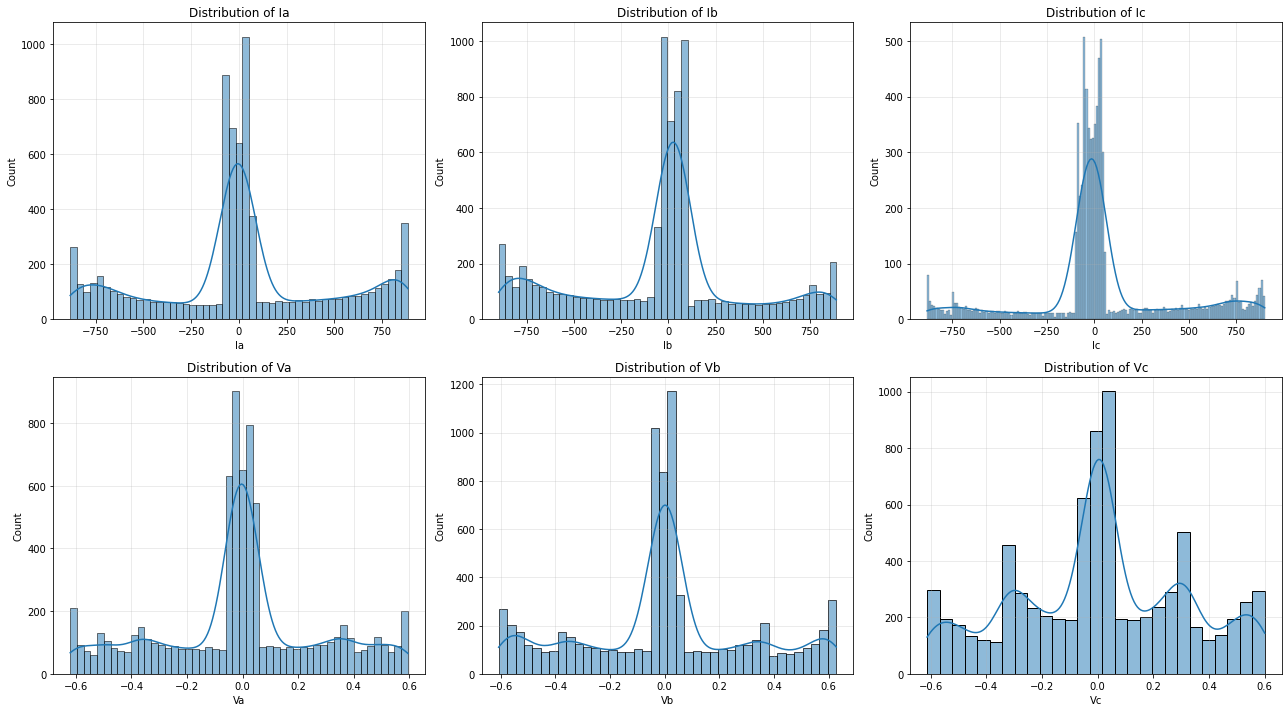

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df contains your dataset with columns Ia, Ib, Ic, Va, Vb, Vc, fault_type
input_cols = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
df = pd.read_csv("../classData.csv")
df['fault_type'] = df[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)
# Create distribution plots for each feature
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(input_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

2. Correlation Heatmap

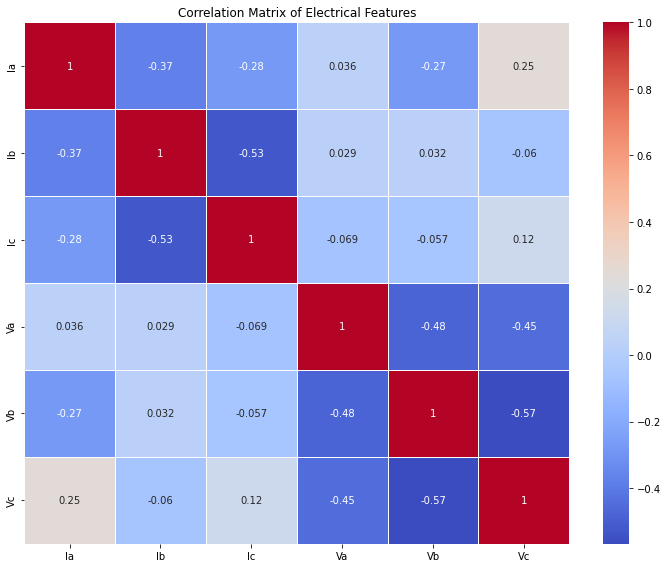

In [23]:
# Create correlation matrix to see relationships between features
plt.figure(figsize=(10, 8))
correlation = df[input_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Electrical Features')
plt.tight_layout()
plt.show()

3. Feature Distribution by Fault Type

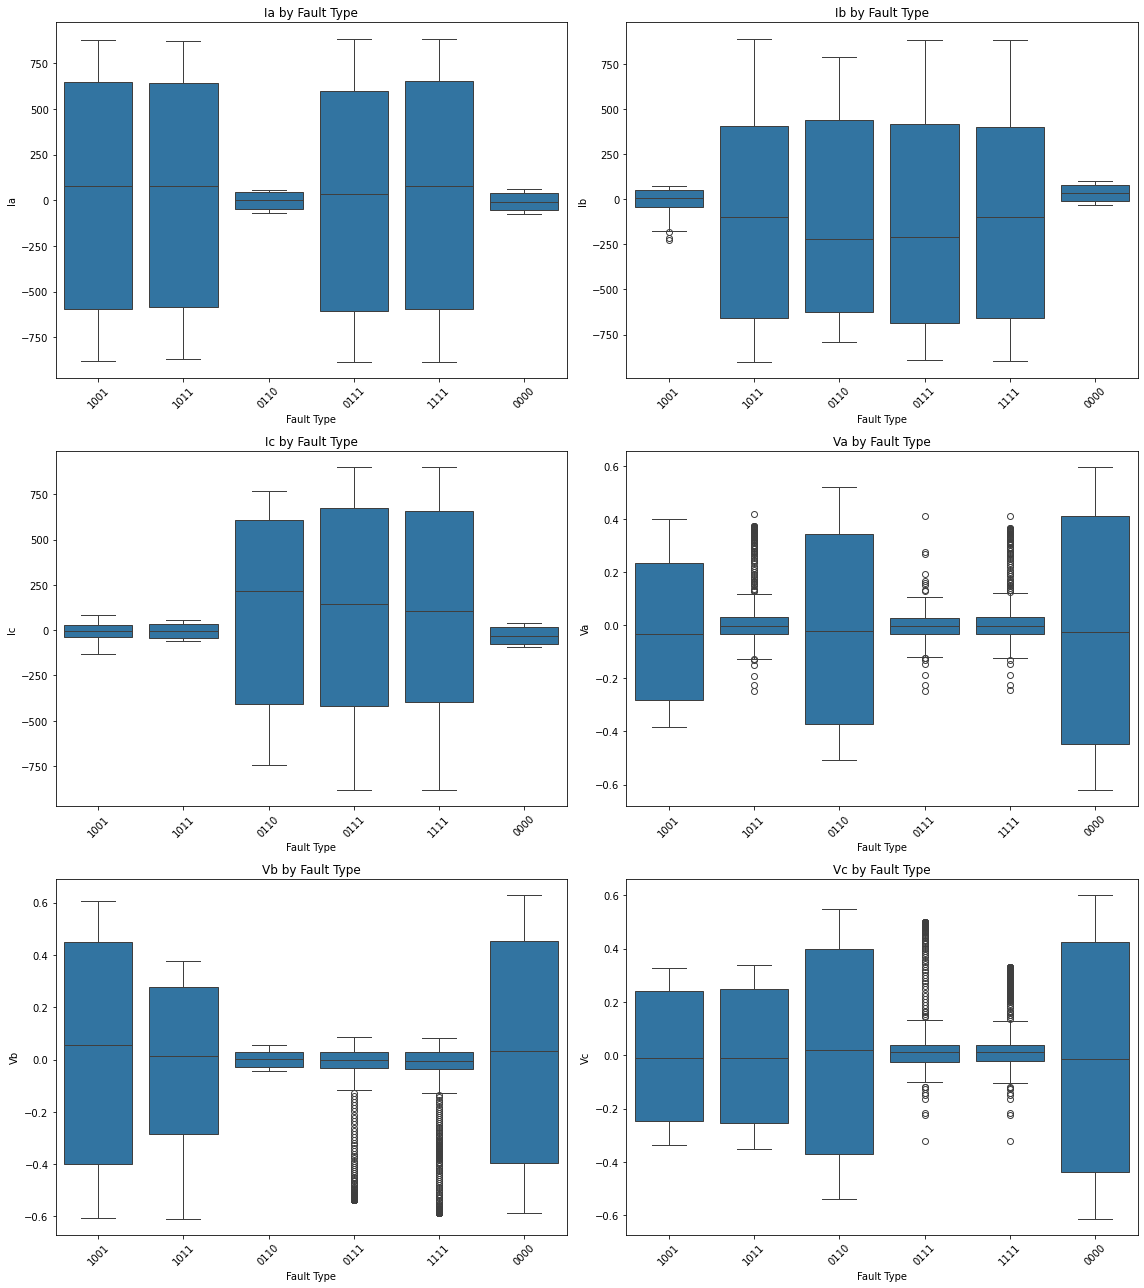

In [24]:
# Create boxplots to see how features vary across different fault types
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, col in enumerate(input_cols):
    sns.boxplot(x='fault_type', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Fault Type')
    axes[i].set_xlabel('Fault Type')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

4. PCA Visualization with Fault Types

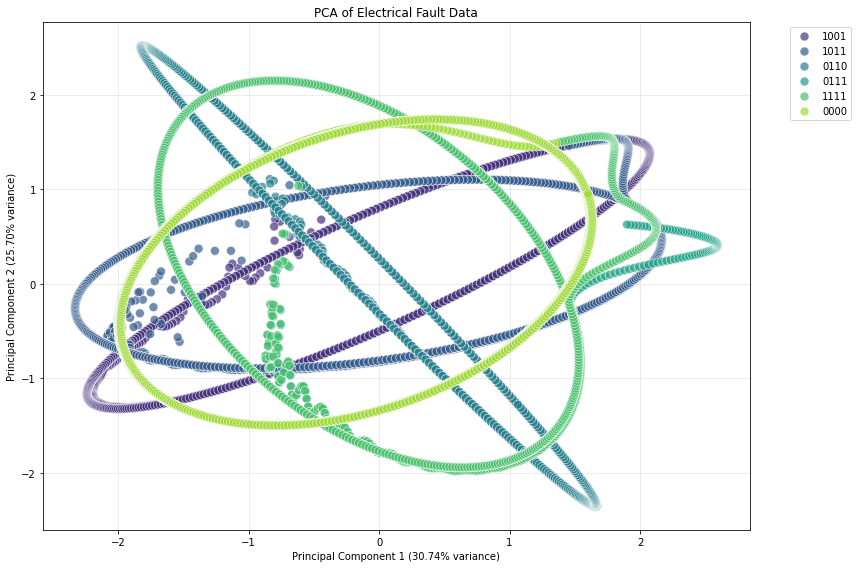

Total variance explained by 2 components: 56.44%


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[input_cols])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create dataframe for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['fault_type'] = df['fault_type'].values

# Plot the 2D projection
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='fault_type', data=pca_df, palette='viridis', s=80, alpha=0.7)
plt.title('PCA of Electrical Fault Data')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print explained variance
print(f"Total variance explained by 2 components: {sum(pca.explained_variance_ratio_):.2%}")

5. t-SNE Visualization

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


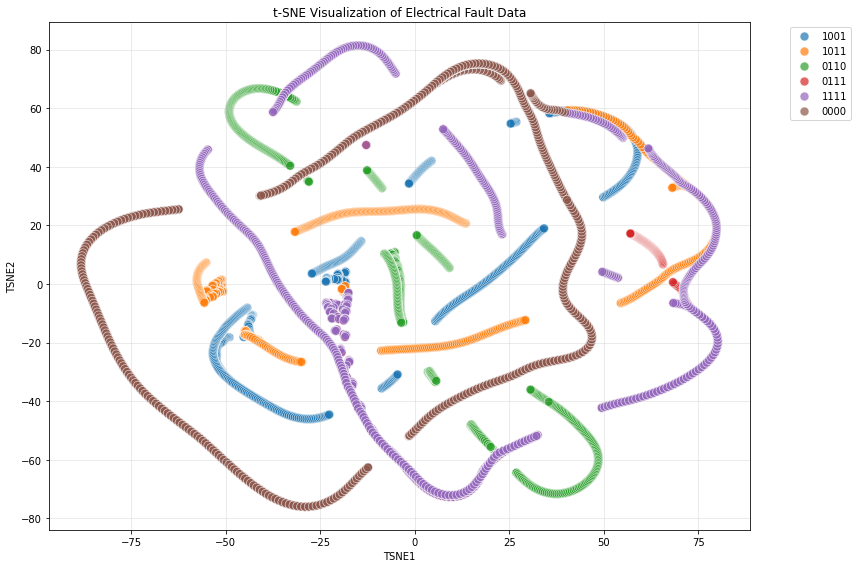

In [26]:
from sklearn.manifold import TSNE

# Apply t-SNE for non-linear dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(X_scaled)

# Create dataframe for plotting
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['fault_type'] = df['fault_type'].values

# Plot the 2D projection
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='fault_type', data=tsne_df, palette='tab10', s=80, alpha=0.7)
plt.title('t-SNE Visualization of Electrical Fault Data')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

6. Phase Analysis Visualization

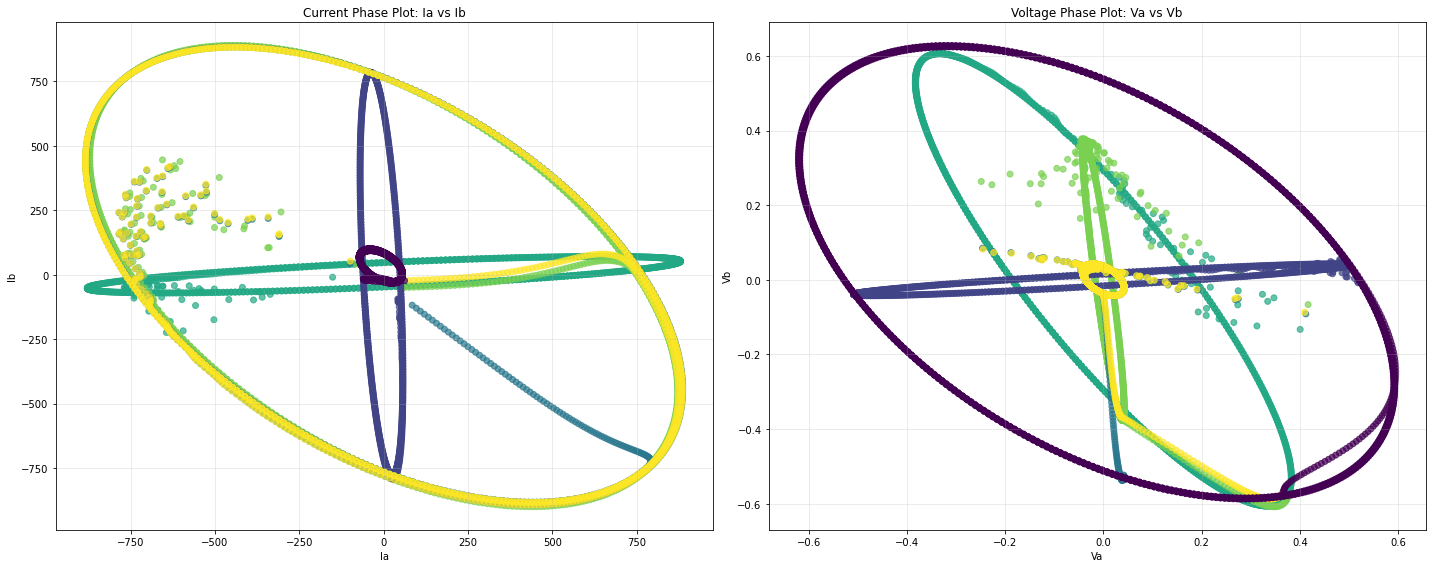

In [27]:
# For 3-phase system, create phase plots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Current phase plot
axes[0].scatter(df['Ia'], df['Ib'], c=df['fault_type'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
axes[0].set_title('Current Phase Plot: Ia vs Ib')
axes[0].set_xlabel('Ia')
axes[0].set_ylabel('Ib')
axes[0].grid(True, alpha=0.3)

# Voltage phase plot
axes[1].scatter(df['Va'], df['Vb'], c=df['fault_type'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
axes[1].set_title('Voltage Phase Plot: Va vs Vb')
axes[1].set_xlabel('Va')
axes[1].set_ylabel('Vb')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

7. Parallel Coordinates Plot

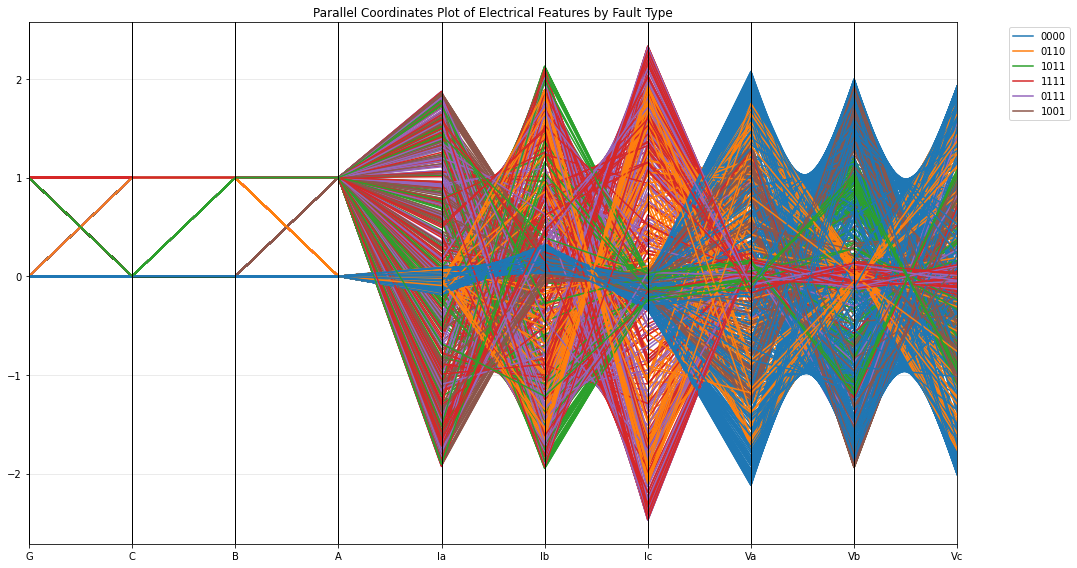

In [28]:
# Create parallel coordinates plot to visualize high-dimensional data
from pandas.plotting import parallel_coordinates

# Sample the data if it's large
sample_df = df.sample(min(1000, len(df))) if len(df) > 1000 else df

# Create a copy of the dataframe with scaled features
scaled_sample = sample_df.copy()
scaled_sample[input_cols] = scaler.transform(sample_df[input_cols])

plt.figure(figsize=(15, 8))
parallel_coordinates(scaled_sample, 'fault_type', color=plt.cm.tab10.colors)
plt.title('Parallel Coordinates Plot of Electrical Features by Fault Type')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

8. Clustering and Silhouette Analysis

For n_clusters = 2, the silhouette score is 0.249
For n_clusters = 3, the silhouette score is 0.236
For n_clusters = 4, the silhouette score is 0.279
For n_clusters = 5, the silhouette score is 0.330
For n_clusters = 6, the silhouette score is 0.352
For n_clusters = 7, the silhouette score is 0.369
For n_clusters = 8, the silhouette score is 0.357
For n_clusters = 9, the silhouette score is 0.397
For n_clusters = 10, the silhouette score is 0.393


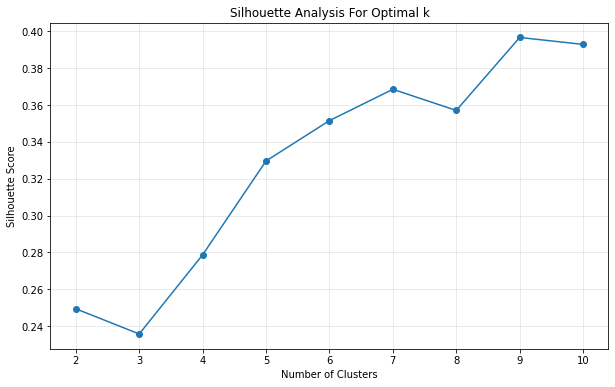

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Determine optimal number of clusters using silhouette score
range_n_clusters = list(range(2, 11))  # Try 2 to 10 clusters
silhouette_avgs = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avgs, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.grid(True, alpha=0.3)
plt.show()

9. 3D PCA Visualization

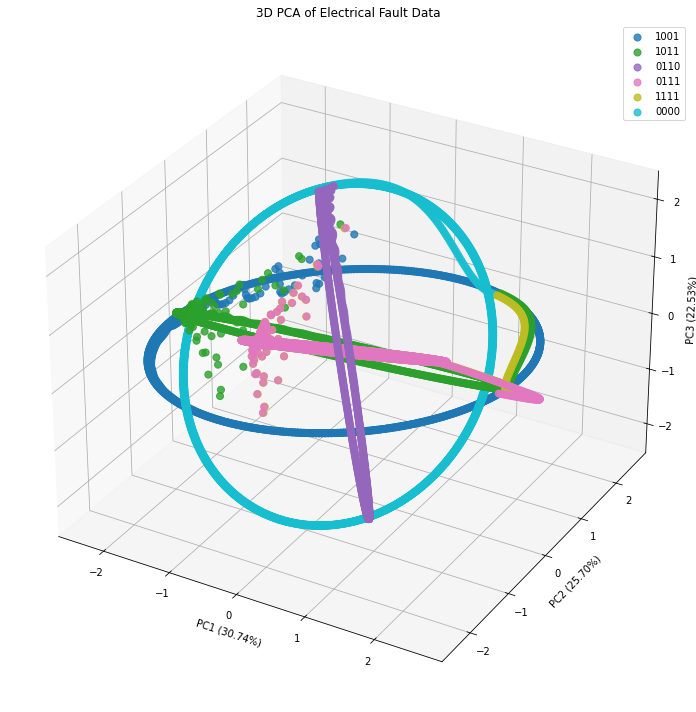

In [30]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Create dataframe for plotting
pca_df = pd.DataFrame(data=principal_components, 
                     columns=['PC1', 'PC2', 'PC3'])
pca_df['fault_type'] = df['fault_type'].values

# Create 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Get unique fault types for coloring
fault_types = pca_df['fault_type'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(fault_types)))

for fault, color in zip(fault_types, colors):
    indices = pca_df['fault_type'] == fault
    ax.scatter(pca_df.loc[indices, 'PC1'], 
               pca_df.loc[indices, 'PC2'], 
               pca_df.loc[indices, 'PC3'],
               color=color, 
               s=50, 
               alpha=0.8, 
               label=fault)

ax.set_title('3D PCA of Electrical Fault Data')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%})')
ax.legend()
plt.tight_layout()
plt.show()

10. UMAP Visualization (Better than t-SNE for Large Datasets)

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


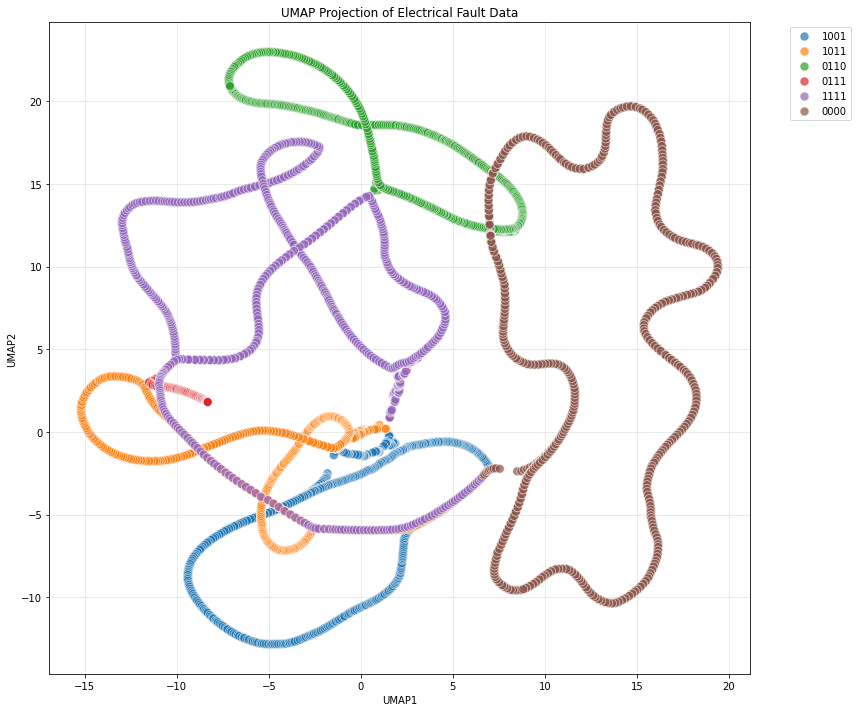

In [31]:
import umap

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_results = reducer.fit_transform(X_scaled)

# Create dataframe for plotting
umap_df = pd.DataFrame(data=umap_results, columns=['UMAP1', 'UMAP2'])
umap_df['fault_type'] = df['fault_type'].values

# Plot results
plt.figure(figsize=(12, 10))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='fault_type', data=umap_df, 
                palette='tab10', s=80, alpha=0.7)
plt.title('UMAP Projection of Electrical Fault Data')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

11. Polar Plot of Three-Phase Currents and Voltages

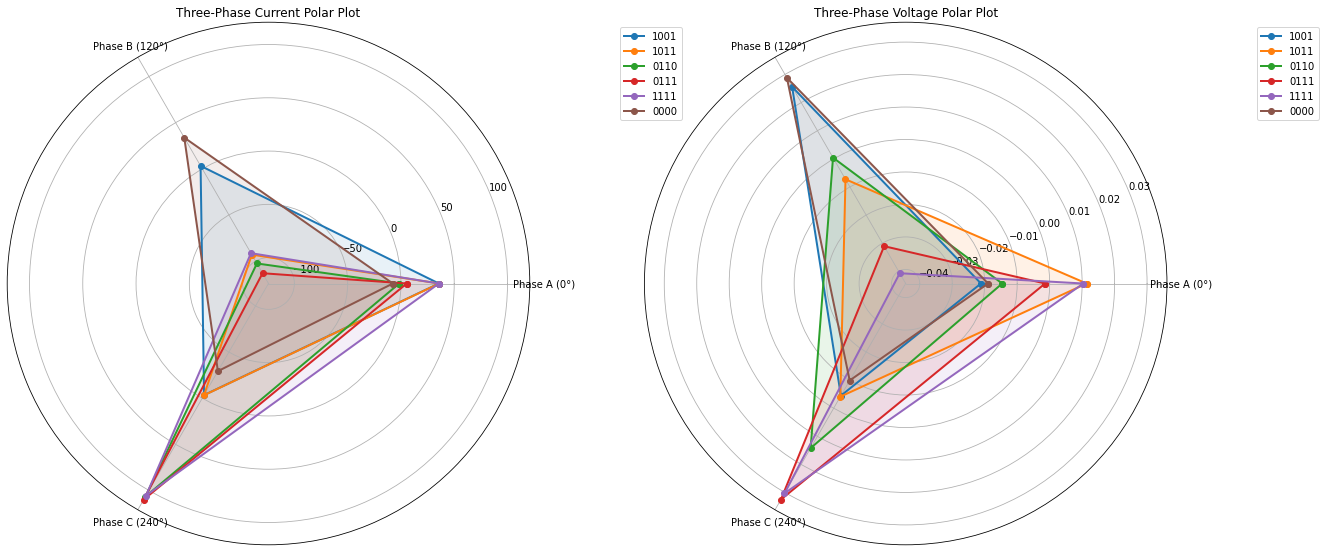

In [32]:
# def plot_polar_representation(df, fault_types=None):
"""Create polar plots of 3-phase currents and voltages"""
# fault_types=None
# if fault_types is None:
#     fault_types = df['fault_type'].unique()[:4]  # Limit to 4 types for clarity

fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': 'polar'})

for fault in fault_types:
    subset = df[df['fault_type'] == fault]
    
    # For each sample, create 3 points at 0°, 120°, and 240°
    angles = np.array([0, 2*np.pi/3, 4*np.pi/3])  # 0°, 120°, 240°
    
    # Average the current/voltage values for this fault type
    currents = subset[['Ia', 'Ib', 'Ic']].mean().values
    voltages = subset[['Va', 'Vb', 'Vc']].mean().values
    
    # Close the loop for the plot
    angles_plot = np.append(angles, angles[0])
    currents_plot = np.append(currents, currents[0])
    voltages_plot = np.append(voltages, voltages[0])
    
    # Current plot
    axes[0].plot(angles_plot, currents_plot, marker='o', linewidth=2, label=fault)
    axes[0].fill(angles_plot, currents_plot, alpha=0.1)
    
    # Voltage plot
    axes[1].plot(angles_plot, voltages_plot, marker='o', linewidth=2, label=fault)
    axes[1].fill(angles_plot, voltages_plot, alpha=0.1)

# Set titles and customize plots
axes[0].set_title('Three-Phase Current Polar Plot')
axes[1].set_title('Three-Phase Voltage Polar Plot')

# Mark phase angles
for ax in axes:
    ax.set_xticks(angles)
    ax.set_xticklabels(['Phase A (0°)', 'Phase B (120°)', 'Phase C (240°)'])
    ax.grid(True)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

# Use the function to plot polar representations
# plot_polar_representation(df)

12. Feature Importance using Random Forest

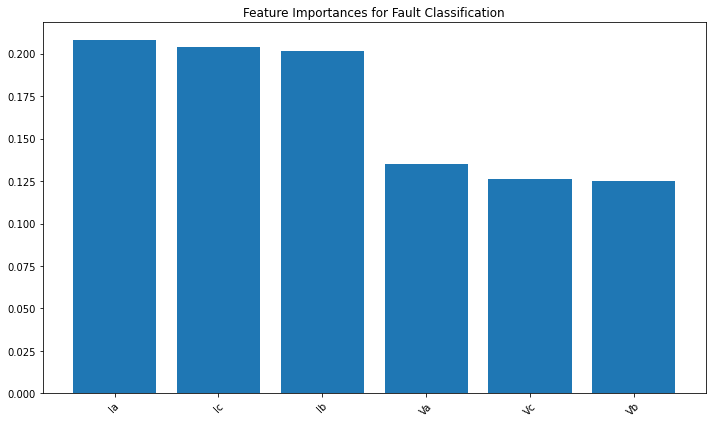

Feature ranking:
1. Ia (0.2080)
2. Ic (0.2039)
3. Ib (0.2015)
4. Va (0.1352)
5. Vc (0.1261)
6. Vb (0.1253)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare data
X = df[input_cols].values
y = df['fault_type'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Fault Classification')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [input_cols[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# Print feature rankings
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. {input_cols[indices[f]]} ({importances[indices[f]]:.4f})")

13. Symmetrical Component Analysis (Critical for Electrical Faults)

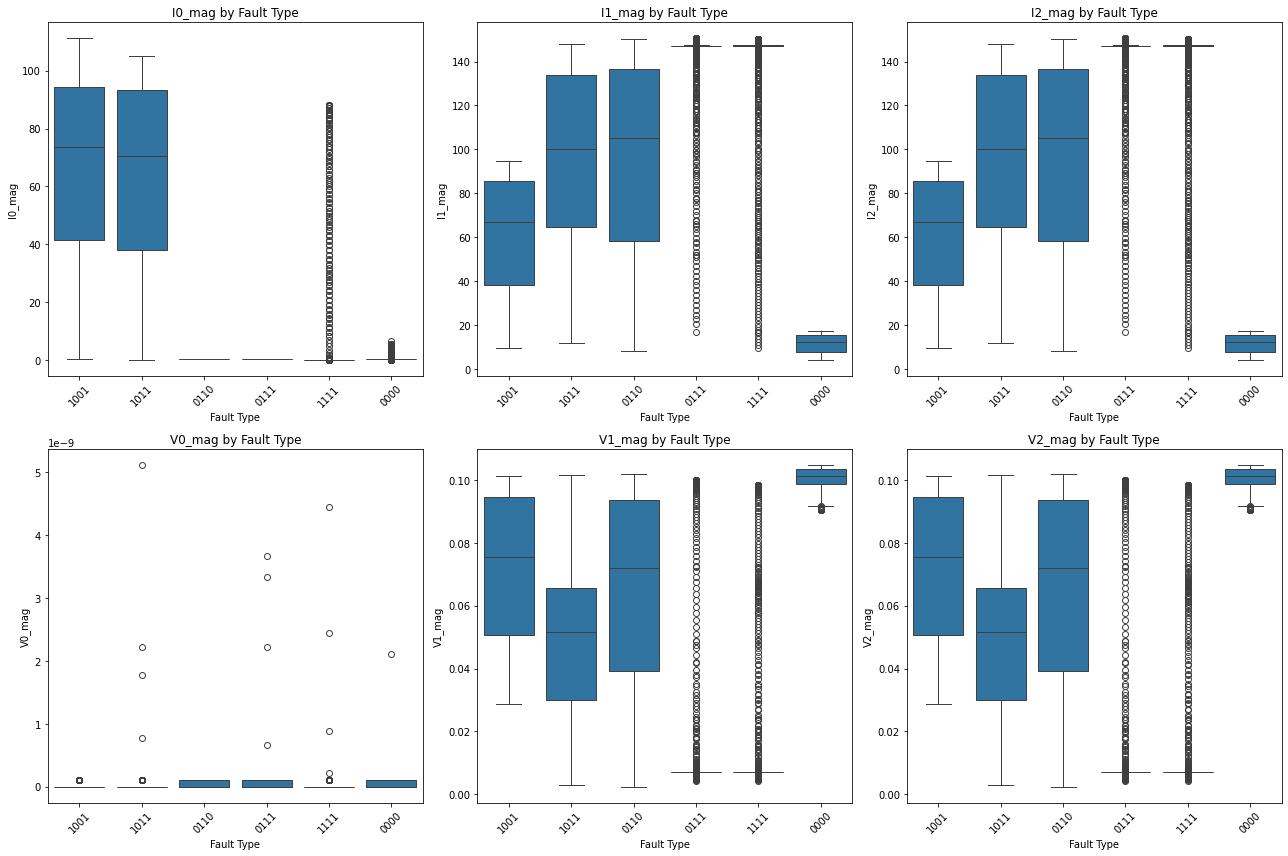

In [34]:
import numpy as np

def calculate_symmetrical_components(df):
    """Calculate positive, negative, and zero sequence components"""
    # Constants
    a = complex(-0.5, 0.866)  # 1∠120°
    a2 = complex(-0.5, -0.866)  # 1∠240°
    
    # Transform matrix
    T = np.array([[1, 1, 1], 
                 [1, a2, a], 
                 [1, a, a2]])
    
    # Initialize result dataframe
    result_df = pd.DataFrame()
    
    # Process each sample
    for idx, row in df.iterrows():
        # Current phasors (assume magnitude only, angle=0 for simplicity)
        # In practice, you would have complex values with magnitude and angle
        I_abc = np.array([complex(row['Ia'], 0), 
                          complex(row['Ib'], 0), 
                          complex(row['Ic'], 0)])
        
        # Voltage phasors
        V_abc = np.array([complex(row['Va'], 0), 
                          complex(row['Vb'], 0), 
                          complex(row['Vc'], 0)])
        
        # Calculate symmetrical components
        I_012 = np.dot(np.linalg.inv(T), I_abc) / 3
        V_012 = np.dot(np.linalg.inv(T), V_abc) / 3
        
        # Add to results
        result_df.loc[idx, 'I0_mag'] = abs(I_012[0])
        result_df.loc[idx, 'I1_mag'] = abs(I_012[1])
        result_df.loc[idx, 'I2_mag'] = abs(I_012[2])
        result_df.loc[idx, 'V0_mag'] = abs(V_012[0])
        result_df.loc[idx, 'V1_mag'] = abs(V_012[1])
        result_df.loc[idx, 'V2_mag'] = abs(V_012[2])
    
    return result_df

# Calculate symmetrical components
sym_components = calculate_symmetrical_components(df)

# Merge with original dataframe
df_with_sym = pd.concat([df, sym_components], axis=1)

# Plot symmetrical components by fault type
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Current components
for i, component in enumerate(['I0_mag', 'I1_mag', 'I2_mag']):
    sns.boxplot(x='fault_type', y=component, data=df_with_sym, ax=axes[i])
    axes[i].set_title(f'{component} by Fault Type')
    axes[i].set_xlabel('Fault Type')
    axes[i].tick_params(axis='x', rotation=45)

# Voltage components
for i, component in enumerate(['V0_mag', 'V1_mag', 'V2_mag']):
    sns.boxplot(x='fault_type', y=component, data=df_with_sym, ax=axes[i+3])
    axes[i+3].set_title(f'{component} by Fault Type')
    axes[i+3].set_xlabel('Fault Type')
    axes[i+3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

14. Fault Type Distribution

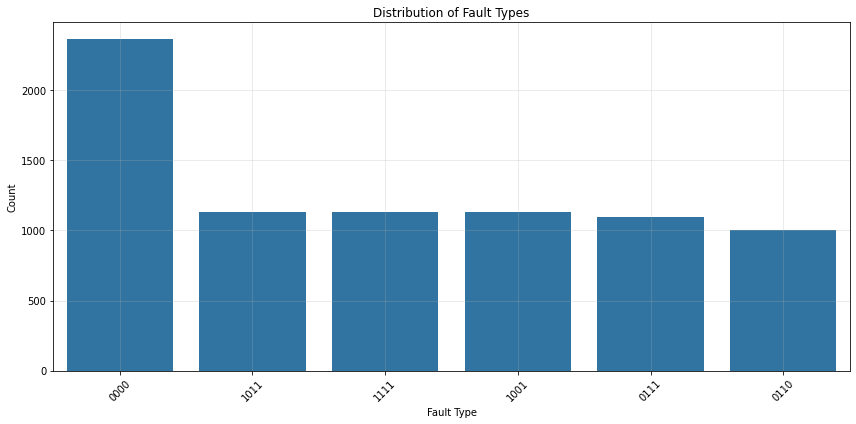

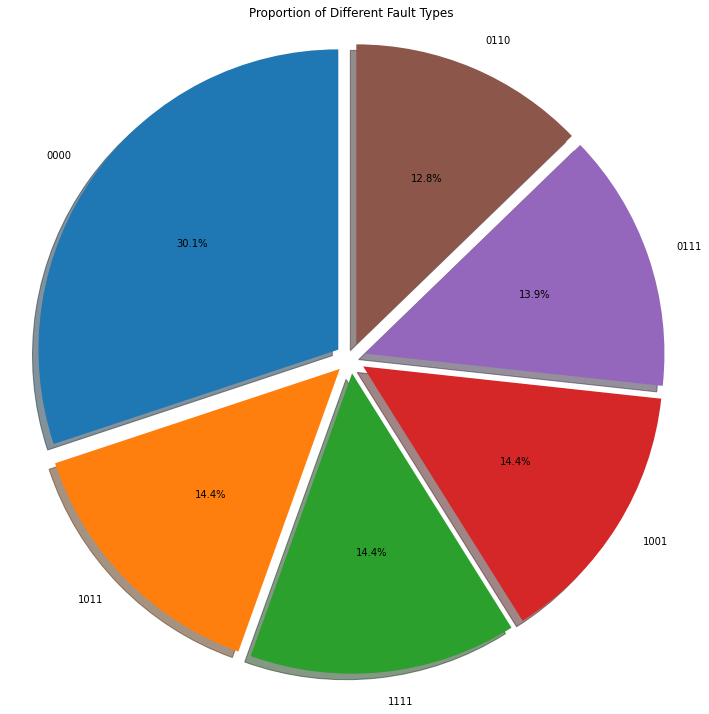

In [35]:
# Plot fault type distribution
plt.figure(figsize=(12, 6))
fault_counts = df['fault_type'].value_counts()
sns.barplot(x=fault_counts.index, y=fault_counts.values)
plt.title('Distribution of Fault Types')
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Pie chart for fault distribution
plt.figure(figsize=(10, 10))
plt.pie(fault_counts.values, labels=fault_counts.index, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=[0.05]*len(fault_counts))
plt.title('Proportion of Different Fault Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

15. Unsupervised Clustering vs. Actual Fault Types

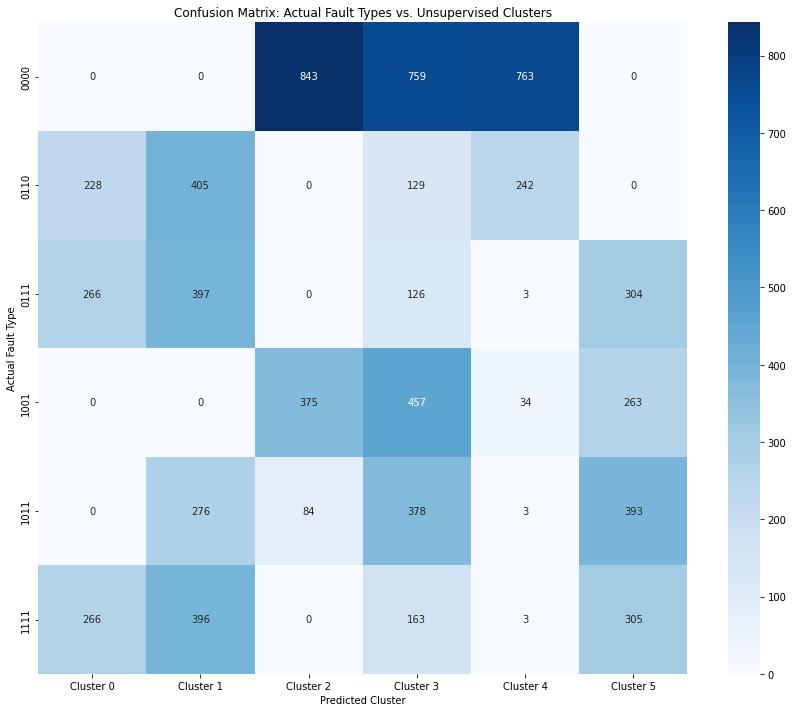

Cluster purity: 0.4362


In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Apply KMeans clustering
n_clusters = len(df['fault_type'].unique())  # Use same number as actual fault types
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Create confusion matrix between clusters and actual fault types
# First, encode fault types to integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fault_encoded = label_encoder.fit_transform(df['fault_type'])

# Create confusion matrix
conf_matrix = confusion_matrix(fault_encoded, clusters)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(n_clusters)],
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Fault Type')
plt.title('Confusion Matrix: Actual Fault Types vs. Unsupervised Clusters')
plt.tight_layout()
plt.show()

# Calculate cluster purity
def calculate_purity(cm):
    return np.sum(np.max(cm, axis=0)) / np.sum(cm)

purity = calculate_purity(conf_matrix)
print(f"Cluster purity: {purity:.4f}")

16. Vector Representation of 3-Phase System

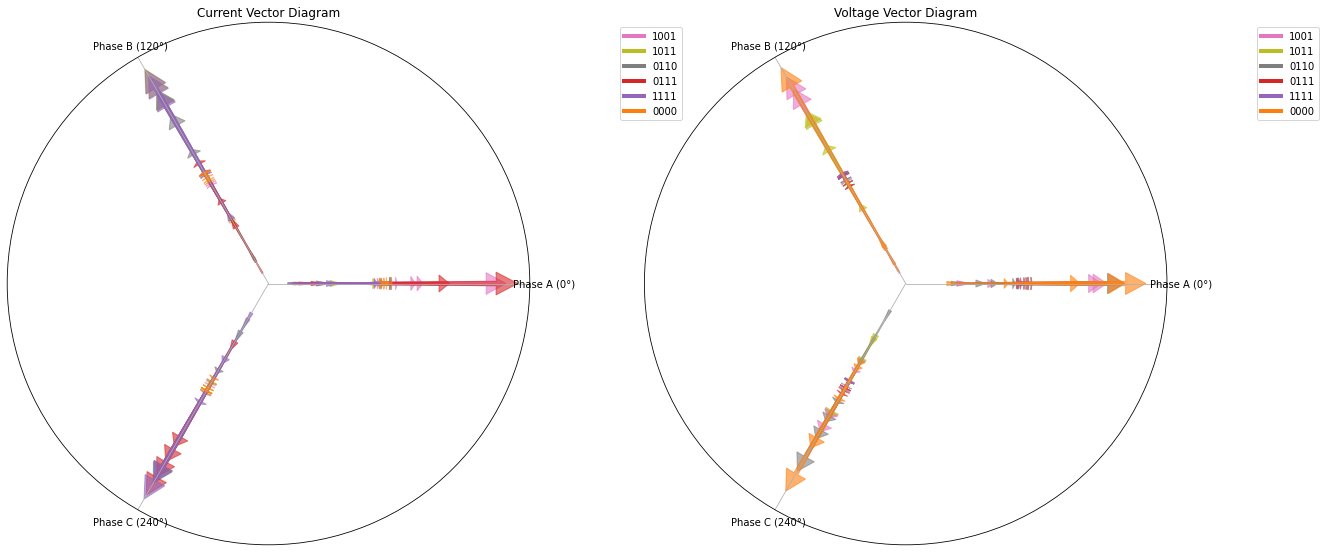

In [37]:
# def plot_vector_diagram(df, num_samples=5):
"""Plot vector diagrams for current and voltage"""
num_samples=5
# Select samples from each fault type
samples = []
for fault in df['fault_type'].unique():
    fault_samples = df[df['fault_type'] == fault].sample(min(num_samples, 
                                    sum(df['fault_type'] == fault)), 
                                    random_state=42)
    samples.append(fault_samples)

selected_samples = pd.concat(samples)

fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': 'polar'})

# For simplicity, assume angles for ABC phases (0°, 120°, 240°)
# In a real application, you would calculate these from your data
angles = {
    'Ia': 0,
    'Ib': 2*np.pi/3,  # 120°
    'Ic': 4*np.pi/3,  # 240°
    'Va': 0,
    'Vb': 2*np.pi/3,  # 120°
    'Vc': 4*np.pi/3,  # 240°
}

# Plot current vectors
for _, row in selected_samples.iterrows():
    fault = row['fault_type']
    color = plt.cm.tab10(hash(fault) % 10 / 10)
    
    # Plot currents
    for phase in ['Ia', 'Ib', 'Ic']:
        magnitude = row[phase]
        angle = angles[phase]
        axes[0].arrow(angle, 0, 0, magnitude, alpha=0.6, width=0.02,
                        head_width=0.1, head_length=magnitude*0.2, color=color)

    # Plot voltages
    for phase in ['Va', 'Vb', 'Vc']:
        magnitude = row[phase]
        angle = angles[phase]
        axes[1].arrow(angle, 0, 0, magnitude, alpha=0.6, width=0.02,
                        head_width=0.1, head_length=magnitude*0.2, color=color)

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=plt.cm.tab10(hash(fault) % 10 / 10), 
                            lw=4, label=fault) 
                    for fault in selected_samples['fault_type'].unique()]

# Set titles and customize plots
axes[0].set_title('Current Vector Diagram')
axes[1].set_title('Voltage Vector Diagram')

for ax in axes:
    ax.set_rticks([])  # Remove radial ticks
    ax.set_xticks([0, 2*np.pi/3, 4*np.pi/3])
    ax.set_xticklabels(['Phase A (0°)', 'Phase B (120°)', 'Phase C (240°)'])
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

# Use the function
# plot_vector_diagram(df)

17. Anomaly Detection Visualization

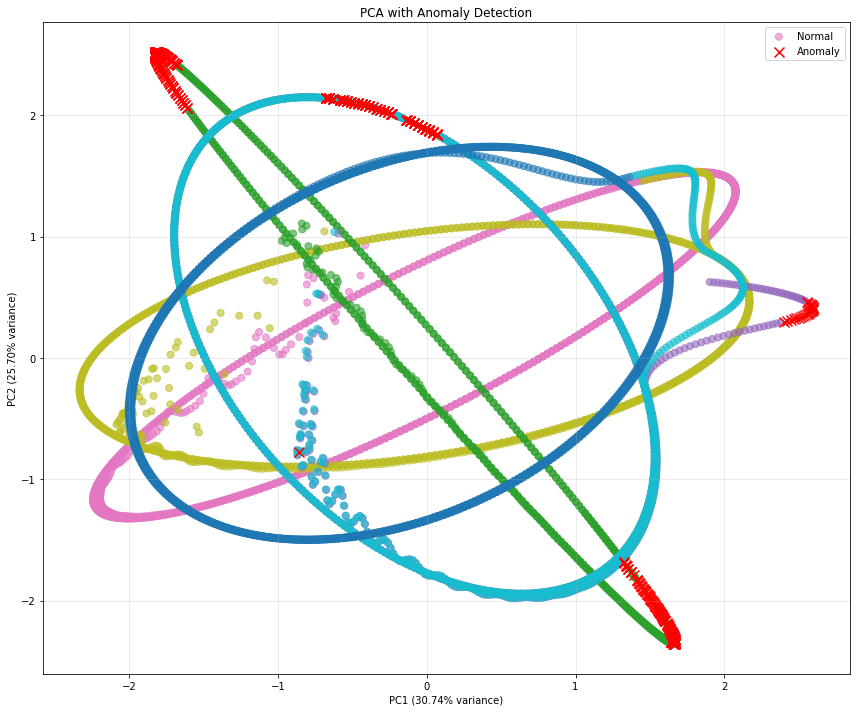

Anomalies by fault type:
fault_type
0110    263
0111     80
1111     50
0000      0
1001      0
1011      0
Name: anomaly, dtype: int64


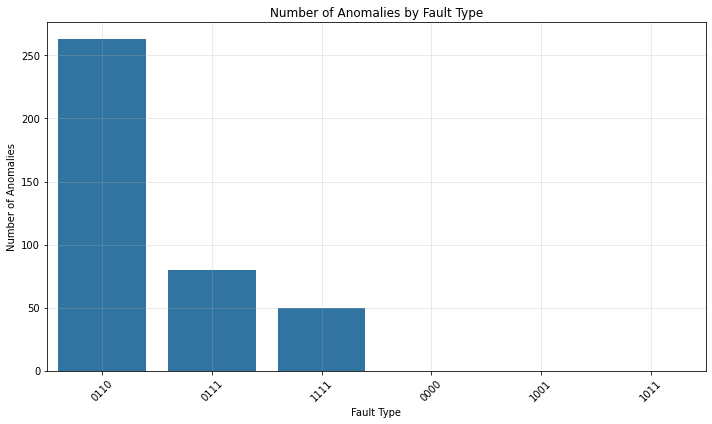

In [38]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(X_scaled)
df['anomaly'] = df['anomaly_score'] == -1  # -1 for anomalies, 1 for normal samples

# Create PCA visualization with anomalies highlighted
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['fault_type'] = df['fault_type'].values
pca_df['anomaly'] = df['anomaly'].values

# Plot normal vs anomalous points
plt.figure(figsize=(12, 10))
plt.scatter(pca_df[~pca_df['anomaly']]['PC1'], pca_df[~pca_df['anomaly']]['PC2'], 
           c=pca_df[~pca_df['anomaly']]['fault_type'].astype('category').cat.codes, 
           cmap='tab10', alpha=0.6, s=50, label='Normal')
plt.scatter(pca_df[pca_df['anomaly']]['PC1'], pca_df[pca_df['anomaly']]['PC2'], 
           color='red', marker='x', s=100, alpha=1, label='Anomaly')
plt.title('PCA with Anomaly Detection')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Count anomalies by fault type
anomaly_by_fault = df.groupby('fault_type')['anomaly'].sum().sort_values(ascending=False)
print("Anomalies by fault type:")
print(anomaly_by_fault)

plt.figure(figsize=(10, 6))
sns.barplot(x=anomaly_by_fault.index, y=anomaly_by_fault.values)
plt.title('Number of Anomalies by Fault Type')
plt.xlabel('Fault Type')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()